In [1]:
#Dependencies:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import pprint as pprint
#import ggplot2 as gg


In [2]:
# Name of the CSV file from US News and World Report:
kaggle_file = "../Resources/universities.csv"
# Name of the file from
insti_file = "../Resources/cc_institution_details.csv"

In [3]:
#Reading the csv file:
uni_df = pd.read_csv(kaggle_file)

In [76]:
new_uni_df = uni_df[["displayName",
                    "city",
                    "state",
                    "rankingSortRank",
                    "act_avg",
                    "sat_avg",
                    "acceptance_rate",
                    "engineeringRepScore",
                    "businessRepScore",
                    "tuition"]]
new_uni_df.head()

,displayName,city,state,rankingSortRank,act_avg,sat_avg,acceptance_rate,engineeringRepScore,businessRepScore,tuition
0,Princeton University,Princeton,NJ,1,32.0,1400.0,7.0,4.1,NaN,47140
1,Harvard University,Cambridge,MA,2,32.0,1430.0,5.0,3.6,NaN,48949
2,University of Chicago,Chicago,IL,3,32.0,1450.0,8.0,NaN,NaN,54825
3,Yale University,New Haven,CT,3,32.0,1420.0,6.0,3.4,NaN,51400
4,Columbia University,New York,NY,5,32.0,1430.0,6.0,3.8,NaN,57208


In [5]:
#Reading the csv file:
insti_df = pd.read_csv(insti_file, encoding="ISO-8859-1")
insti_df.head()

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [6]:
new_insti_df = insti_df[["chronname","control","grad_100_value","retain_value"]]

#Finding UNCC in the big dataset:
new_insti_dfuncc=new_insti_df.loc[new_insti_df['chronname']=='University of North Carolina at Charlotte',:]
#new_insti_dfuncc

#drop NaN rows
no_null_cleaner_insti_df = new_insti_df.dropna(how='any')

#drop the institutions with a grad_100_value of 0
no_null_cleaner_insti_no0_grad = no_null_cleaner_insti_df.loc[no_null_cleaner_insti_df['grad_100_value']!=0.0]
#try it
no_null_cleaner_insti_no0_grad.head()

#drop the institutions with a retain_value of 0
no_null_cleaner_insti_no0_grad_no0_retain = no_null_cleaner_insti_no0_grad.loc[no_null_cleaner_insti_no0_grad['retain_value']!=0.0]
#drop the 100s of grad_100
cleaner_insti_no0_grad_no0_retain_no100grad = no_null_cleaner_insti_no0_grad_no0_retain.loc[no_null_cleaner_insti_no0_grad_no0_retain['grad_100_value']!=100]
#drop the 100s of retain_value
cleaner_insti_no0grad_no0_retain_no100grad_no100retain = cleaner_insti_no0_grad_no0_retain_no100grad.loc[cleaner_insti_no0_grad_no0_retain_no100grad['retain_value']!=100]
#make it easier to read
clean_insti = cleaner_insti_no0grad_no0_retain_no100grad_no100retain

#try it out
clean_insti.head()

#Seperate private and public here so I don't need to do the same thing twice.
final_private=clean_insti.loc[clean_insti['control']=='Private not-for-profit']
final_public=clean_insti.loc[clean_insti['control']=='Public']

#I need numbers for the pie chart below
public_total = final_public['chronname'].count()
private_total = final_private['chronname'].count()

#since the private for-profit isn't in here, I'll need to keep total to just private and public
final_total = public_total+private_total
public_40=final_public.head(40)
private_40=final_private.head(40)
final_all=private_40.append(public_40)
final_all['sequence']=range(1,1+len(final_all))
#since final_all is huuuuuuge, I'm going to limit it to the first 80.
final_80=final_all.head(80)


In [7]:
#Checking to make sure what I expect to be there is.
final_all
#Maybe I should sort this, based on grad_100_value...
retain_final_all = final_all.sort_values(['grad_100_value'],ascending=False)
last_all=retain_final_all.head(80)
last_all_newf = last_all.rename({"chronname":"displayName"}, axis=1)
last_all_newf.head()

,displayName,control,grad_100_value,retain_value,rankingSortRank
51,Talladega College,Private not-for-profit,82.4,32.9,14
163,California Institute of Technology,Private not-for-profit,82.3,96.6,37
155,Bethesda Christian University,Private not-for-profit,65.2,92.9,33
122,Hendrix College,Private not-for-profit,63.3,87.8,24
164,California Lutheran University,Private not-for-profit,61.3,84.8,38


In [52]:
new_insti2 = new_insti_df.rename({"chronname": "displayName"}, axis=1)
new_insti2.head()
new_insti2uncc=new_insti2.loc[new_insti2['displayName']=='University of North Carolina at Charlotte', :]
new_insti2uncc['sequence']=81
#new_insti2uncc.head()
new_insti2uncw=new_insti2.loc[new_insti2['displayName']=='University of North Carolina at Wilmington',:]
new_insti2uncw['sequence']=82
new_insti2unca=new_insti2.loc[new_insti2['displayName']=='University of North Carolina at Asheville',:]
new_insti2unca['sequence']=83
#new_insti2uncw.head()
#new_insti2ucberkley=new_insti2.loc[new_insti2['displayName']=='University of North Carolina at Wilmington',:]
#new_insti2uncw['sequence']=82
#new_insti2uncw.head()
#erge_df['sequence']=range(1,1+len(merge_df))

C:\Users\mulrich\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mulrich\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\mulrich\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [9]:
#Merge two dataframes using an inner join
merge_df = pd.merge(new_uni_df, new_insti2, on = "displayName")
merge_df.head(80)

,displayName,city,state,rankingSortRank,act_avg,sat_avg,acceptance_rate,engineeringRepScore,businessRepScore,tuition,control,grad_100_value,retain_value
0,Princeton University,Princeton,NJ,1,32.0,1400.0,7.0,4.1,NaN,47140,Private not-for-profit,87.8,97.6
1,Harvard University,Cambridge,MA,2,32.0,1430.0,5.0,3.6,NaN,48949,Private not-for-profit,86.5,97.1
2,University of Chicago,Chicago,IL,3,32.0,1450.0,8.0,NaN,NaN,54825,Private not-for-profit,87.9,99.3
3,Yale University,New Haven,CT,3,32.0,1420.0,6.0,3.4,NaN,51400,Private not-for-profit,89.6,98.7
4,Columbia University,New York,NY,5,32.0,1430.0,6.0,3.8,NaN,57208,Private not-for-profit,85.6,97.3
5,Massachusetts Institute of Technology,Cambridge,MA,5,33.0,1460.0,8.0,4.9,4.6,49892,Private not-for-profit,83.5,97.9
6,Stanford University,Stanford,CA,5,31.0,1380.0,5.0,4.8,NaN,49617,Private not-for-profit,76.1,98.6
7,University of Pennsylvania,Philadelphia,PA,8,32.0,1380.0,9.0,3.6,4.8,53534,Private not-for-profit,87.9,97.8
8,Duke University,Durham,NC,9,31.0,1380.0,11.0,3.7,NaN,53744,Private not-for-profit,87.1,97.2
9,California Institute of Technology,Pasadena,CA,10,34.0,1510.0,8.0,4.6,NaN,49908,Private not-for-profit,82.3,96.6


In [10]:
#merge_df['sequence']=range(1,1+len(merge_df))
#Merge two more on outer join
merge_final=pd.merge(merge_df,last_all_newf, on = "grad_100_value", how="outer")
merge_last_table=merge_final.head(80)
#this dataset is different. interesting. University of Pennsylvania is higher, and I don't know why.
merge_last_table

,displayName_x,city,state,rankingSortRank_x,act_avg,sat_avg,acceptance_rate,engineeringRepScore,businessRepScore,tuition,control_x,grad_100_value,retain_value_x,displayName_y,control_y,retain_value_y,rankingSortRank_y
0,Princeton University,Princeton,NJ,1.0,32.0,1400.0,7.0,4.1,NaN,47140.0,Private not-for-profit,87.8,97.6,NaN,NaN,NaN,NaN
1,Harvard University,Cambridge,MA,2.0,32.0,1430.0,5.0,3.6,NaN,48949.0,Private not-for-profit,86.5,97.1,NaN,NaN,NaN,NaN
2,Dartmouth College,Hanover,NH,11.0,30.0,1350.0,11.0,3.2,NaN,52950.0,Private not-for-profit,86.5,97.9,NaN,NaN,NaN,NaN
3,University of Chicago,Chicago,IL,3.0,32.0,1450.0,8.0,NaN,NaN,54825.0,Private not-for-profit,87.9,99.3,NaN,NaN,NaN,NaN
4,University of Pennsylvania,Philadelphia,PA,8.0,32.0,1380.0,9.0,3.6,4.8,53534.0,Private not-for-profit,87.9,97.8,NaN,NaN,NaN,NaN
5,Yale University,New Haven,CT,3.0,32.0,1420.0,6.0,3.4,NaN,51400.0,Private not-for-profit,89.6,98.7,NaN,NaN,NaN,NaN
6,Columbia University,New York,NY,5.0,32.0,1430.0,6.0,3.8,NaN,57208.0,Private not-for-profit,85.6,97.3,NaN,NaN,NaN,NaN
7,Massachusetts Institute of Technology,Cambridge,MA,5.0,33.0,1460.0,8.0,4.9,4.6,49892.0,Private not-for-profit,83.5,97.9,NaN,NaN,NaN,NaN
8,Stanford University,Stanford,CA,5.0,31.0,1380.0,5.0,4.8,NaN,49617.0,Private not-for-profit,76.1,98.6,NaN,NaN,NaN,NaN
9,Duke University,Durham,NC,9.0,31.0,1380.0,11.0,3.7,NaN,53744.0,Private not-for-profit,87.1,97.2,NaN,NaN,NaN,NaN


In [41]:
#new_insti2.set_index('retain_value')
#new_insti2.head()
#new_insti3=new_insti2.loc[(new_insti2.loc['retain_value']!=100)]
#new_insti3'
merge_last_table_drops=merge_last_table.drop(columns=['displayName_y','control_y', 'retain_value_y','rankingSortRank_y'], index=1)
merge_last_table_last = merge_last_table_drops.rename(index=str, columns={"displayName_x": "displayName", "rankingSortRank_x": "rankingSortRank","control_x":"control","retain_value_x":"retain_value"})
public_universities_df=merge_last_table_last.loc[merge_last_table_last['control']=='Public',:]
private_universities_df=merge_last_table_last.loc[merge_last_table_last['control']=='Private not-for-profit',:]
merge_last_table_last['sequence']=range(1,1+len(merge_last_table_last))


In [12]:
merge_df["act_avg"] = merge_df["act_avg"].replace("NaN", np.nan).fillna(0)
merge_df["sat_avg"] = merge_df["sat_avg"].replace("NaN", np.nan).fillna(0)
merge_df["acceptance_rate"] = merge_df["acceptance_rate"].replace("NaN", np.nan).fillna(0)
merge_df["retain_value"] = merge_df["retain_value"].replace("NaN", np.nan).fillna(0)
merge_df["grad_100_value"] = merge_df["grad_100_value"].replace("NaN", np.nan).fillna(0)
merge_df["engineeringRepScore"] = merge_df["engineeringRepScore"].replace("NaN", np.nan).fillna(0)
merge_df["businessRepScore"] = merge_df["businessRepScore"].replace("NaN", np.nan).fillna(0)

In [35]:
merge_last_table_last["act_avg"] = merge_last_table_last["act_avg"].replace("NaN", np.nan).fillna(0)
merge_last_table_last["sat_avg"] = merge_last_table_last["sat_avg"].replace("NaN", np.nan).fillna(0)
merge_last_table_last["acceptance_rate"] = merge_last_table_last["acceptance_rate"].replace("NaN", np.nan).fillna(0)
merge_last_table_last["engineeringRepScore"] = merge_last_table_last["engineeringRepScore"].replace("NaN", np.nan).fillna(0)
merge_last_table_last["businessRepScore"] = merge_last_table_last["businessRepScore"].replace("NaN", np.nan).fillna(0)
#merge_last_table_last.columns

Index(['displayName', 'city', 'state', 'rankingSortRank', 'act_avg', 'sat_avg',
       'acceptance_rate', 'engineeringRepScore', 'businessRepScore', 'tuition',
       'control', 'grad_100_value', 'retain_value_x'],
      dtype='object')

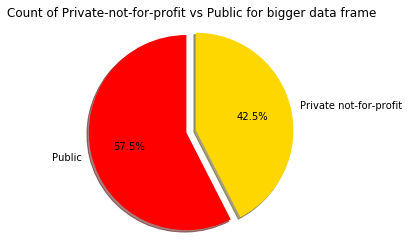

<Figure size 432x288 with 0 Axes>

In [14]:
# Determine counts for pie chart
#since I'm looking at the full set here, I want to keep all values, and not limit it to just the 80, as that will give
#me a 50/50
all_private_count = final_private['chronname'].count()
all_public_count = final_public['chronname'].count()
all_total_count = last_all['chronname'].count()
#Determine sizes for pie chart
all_public_percent = (all_public_count)/(all_total_count)
all_private_percent = (all_private_count)/(all_total_count)
# Build Pie Chart
labels = 'Public','Private not-for-profit'
sizes = [all_public_percent, all_private_percent]
colors="Red","Gold"
explode = [0,0.1]
plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.title('Count of Private-not-for-profit vs Public for bigger data frame')
# Show Figure
plt.show()
plt.savefig('privatepublicall.png')

In [15]:
# Determine axes for the public and private Business score
mean_public_business_score =public_universities_df['businessRepScore'].mean()
mean_public_engineering_score = public_universities_df['engineeringRepScore'].mean()
mean_private_business_score = private_universities_df['businessRepScore'].mean()
mean_private_engineering_score = private_universities_df['engineeringRepScore'].mean()
x_axispub = 'Public'
x_axispri ='Private' 


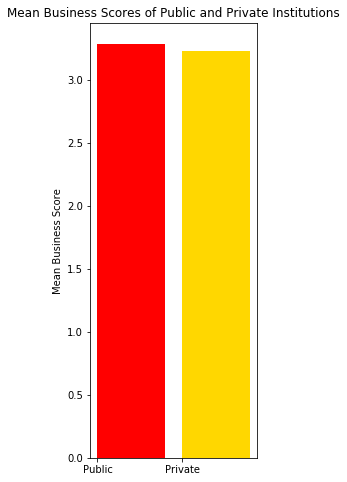

In [16]:
#Our hypothesis stated that the rankings were not necessarily dependent on the money spent. This appears to support it.
plt.figure(figsize=(3,8))
pubbusbar = plt.bar(x_axispub, mean_public_business_score, color='Red', align="edge")
pribusbar = plt.bar(x_axispri, mean_private_business_score, color='Gold', align="edge")
plt.title("Mean Business Scores of Public and Private Institutions")
plt.ylabel("Mean Business Score")
plt.show()

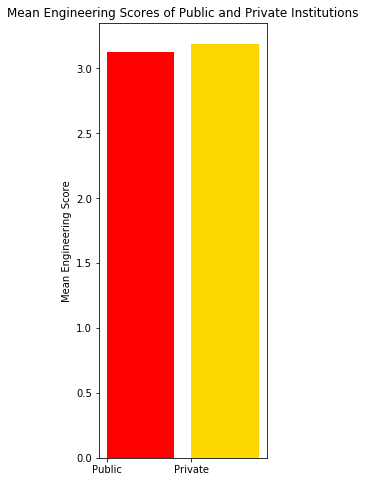

In [17]:
plt.figure(figsize=(3,8))
pub_eng_bar = plt.bar(x_axispub, mean_public_engineering_score, color='Red', align="edge")
pri_eng_bar = plt.bar(x_axispri, mean_private_engineering_score, color='Gold', align="edge")
plt.title("Mean Engineering Scores of Public and Private Institutions")
plt.ylabel("Mean Engineering Score")
plt.show()

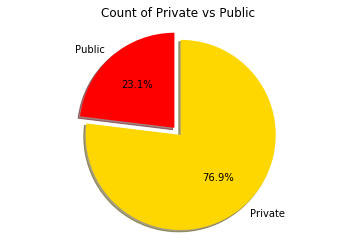

<Figure size 432x288 with 0 Axes>

In [19]:
#Determine sizes for pie chart
public_count = public_universities_df['displayName'].count()
public_count
private_count = private_universities_df['displayName'].count()
total_count = public_count+private_count
public_percent = (public_count)/(total_count)
private_percent = (private_count)/(total_count)
# Build Pie Chart
labels = 'Public','Private'
sizes = [public_percent, private_percent]
colors="Red","Gold"
explode = [0,0.1]
plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.title('Count of Private vs Public')
# Show Figure
plt.show()
plt.savefig('publicprivatepie.png')

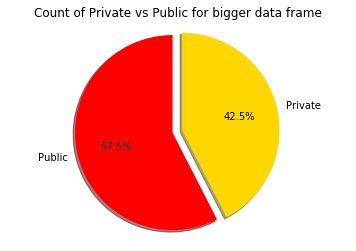

<Figure size 432x288 with 0 Axes>

In [20]:
# Determine counts for pie chart
#since I'm looking at the full set here, I want to keep all values, and not limit it to just the 80, as that will give
#me a 50/50
all_private_count = final_private['chronname'].count()
all_public_count = final_public['chronname'].count()
all_total_count = last_all['chronname'].count()
#Determine sizes for pie chart
all_public_percent = (all_public_count)/(all_total_count)
all_private_percent = (all_private_count)/(all_total_count)
# Build Pie Chart
labels = 'Public','Private'
sizes = [all_public_percent, all_private_percent]
colors="Red","Gold"
explode = [0,0.1]
plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.title('Count of Private vs Public for bigger data frame')
# Show Figure
plt.show()
plt.savefig('privatpublicall.png')
#Since this is only the count of each, the ratio is interesting to me, but there's little else I can do with it.

In [21]:
public_tuition = public_universities_df['tuition'].sum()
private_tuition = private_universities_df['tuition'].sum()
total_tuition = public_tuition+private_tuition
print(total_tuition)
print(public_tuition)
print(private_tuition)
#print(private_count+public_count)

3568222.0
617470.0
2950752.0


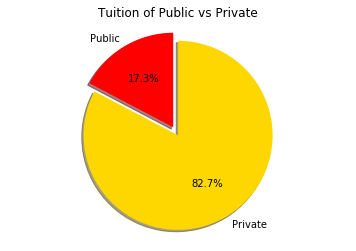

In [24]:
#Determine sizes for pie chart
public_count = public_universities_df['displayName'].count()
private_count = private_universities_df['displayName'].count()
total_count = public_count+private_count
publictuition_percent = (public_tuition)/(total_tuition)
privatetuition_percent = (private_tuition)/(total_tuition)
# Build Pie Chart
labels = 'Public','Private'
sizes = [publictuition_percent, privatetuition_percent]
colors="Red","Gold"
explode=[0,0.1]
plt.pie(sizes, labels=labels,explode=explode,colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.title('Tuition of Public vs Private')
# Show Figure
plt.show()

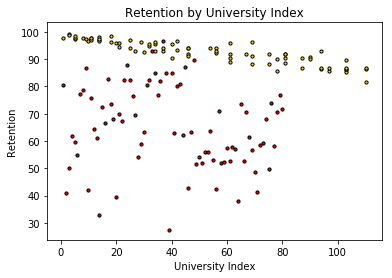

<Figure size 432x288 with 0 Axes>

In [48]:
#merge_table2['displayName'].count()
totalcount=merge_last_table_last['rankingSortRank']
total_grad=merge_last_table_last['grad_100_value']
total_retain=merge_last_table_last['retain_value']
totalcount_2= merge_last_table_last['rankingSortRank']
#gradavg2=merge_table2['grad_100_value']
#retain2=merge_table2['retain_value']
total_count2=last_all['rankingSortRank']
grad_2=last_all['grad_100_value']
retain_2=last_all['retain_value']
#s=merge_table2['sequence'=='81']
#scatter_total_uncc = plt.scatter(total_count2,retain_2,s=100,facecolor='Red',edgecolor='Black')
scatter_total_all=plt.scatter(total_count2,retain_2,s=10,facecolor='Red',edgecolor='Black')
#plt.text[81,80,s="uncc"]
scatter_total=plt.scatter(totalcount,total_retain,s=10,facecolor='Gold',edgecolor='Black')
plt.title("Retention by University Index")
plt.xlabel("University Index")
plt.ylabel("Retention")

plt.show()
plt.savefig('nonsenseretention.png')
#This, as I predicted, is nonsense.

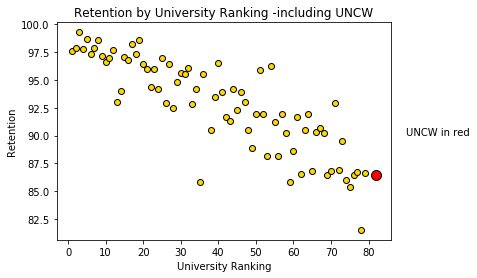

<Figure size 432x288 with 0 Axes>

In [50]:
totalcount=merge_last_table_last['sequence']
total_grad=merge_last_table_last['grad_100_value']
total_retain=merge_last_table_last['retain_value']
totalcount_3= totalcount
#gradavg2=merge_table2['grad_100_value']
#retain2=merge_table2['retain_value']
total_count3=new_insti2uncw['sequence']
grad_3=new_insti2uncw['grad_100_value']
retain_3=new_insti2uncw['retain_value']
#s=merge_table2['sequence'=='81']
scatter_total_uncw = plt.scatter(total_count3,retain_3,s=100,facecolor='Red',edgecolor='Black')
#plt.text[81,80,s="uncc"]
scatter_total=plt.scatter(totalcount,total_retain,facecolor='Gold',edgecolor='Black')
plt.title("Retention by University Ranking -including UNCW")
plt.xlabel("University Ranking")
plt.ylabel("Retention")
plt.text(90,90, s='UNCW in red', fontdict=None, withdash=False)
plt.show()
plt.savefig('retentionuncw.png')

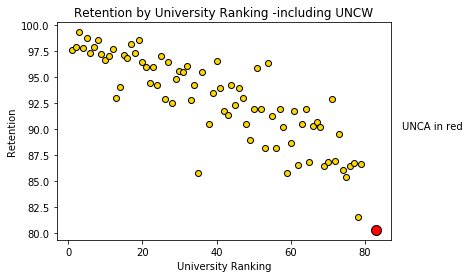

<Figure size 432x288 with 0 Axes>

In [53]:
#So I graduated from UNCA. Let's see where it falls on Retention (guessing not great)

#gradavg2=merge_table2['grad_100_value']
#retain2=merge_table2['retain_value']
total_count4=new_insti2unca['sequence']
grad_4=new_insti2unca['grad_100_value']
retain_4=new_insti2unca['retain_value']
#s=merge_table2['sequence'=='81']
scatter_total_unca = plt.scatter(total_count4,retain_4,s=100,facecolor='Red',edgecolor='Black')
#plt.text[81,80,s="uncc"]
scatter_total=plt.scatter(totalcount,total_retain,facecolor='Gold',edgecolor='Black')
plt.title("Retention by University Ranking -including UNCW")
plt.xlabel("University Ranking")
plt.ylabel("Retention")
plt.text(90,90, s='UNCA in red', fontdict=None, withdash=False)
plt.show()
plt.savefig('retentionunca.png')
#My answer is, as expected, not great.

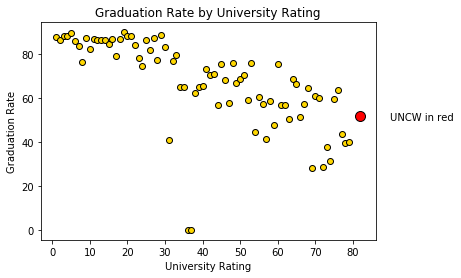

<Figure size 432x288 with 0 Axes>

In [57]:
total_count_uncw=new_insti2uncw['sequence']
grad_uncw=new_insti2uncw['grad_100_value']
retain_uncw=new_insti2uncw['retain_value']
scatter_total_grad_uncw = plt.scatter(total_count_uncw,grad_uncw,s=100,facecolor='Red',edgecolor='Black')
#plt.text[81,80,s="uncc"]
scatter_total_grad=plt.scatter(totalcount,total_grad,facecolor='Gold',edgecolor='Black')
plt.title("Graduation Rate by University Rating")
plt.xlabel("University Rating")
plt.ylabel("Graduation Rate")
plt.text(90,50, s='UNCW in red', fontdict=None, withdash=False)
plt.show()
plt.savefig("graduationrateuncw.png")

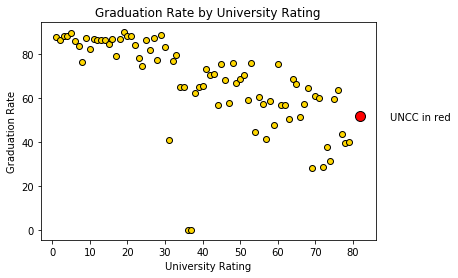

<Figure size 432x288 with 0 Axes>

In [58]:
scatter_total_grad_uncc = plt.scatter(total_count3,grad_3,s=100,facecolor='Red',edgecolor='Black')
#plt.text[81,80,s="uncc"]
scatter_total_grad=plt.scatter(totalcount,total_grad,facecolor='Gold',edgecolor='Black')
plt.title("Graduation Rate by University Rating")
plt.xlabel("University Rating")
plt.ylabel("Graduation Rate")
plt.text(90,50,s='UNCC in red',fontdict=None, withdash=False)
plt.show()
plt.savefig('UNCCgradratexrating.png')

78

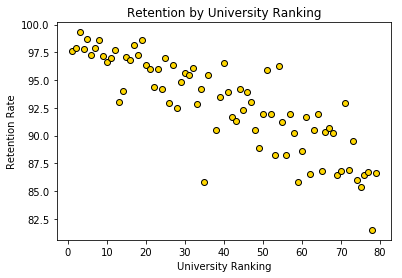

In [74]:
#So I eventually made scatter plots of just the total retain by the ranking
scatter_total_grad = plt.scatter(totalcount,total_retain,facecolor='Gold',edgecolor='Black')
plt.title("Retention by University Ranking")
plt.xlabel("University Ranking")
plt.ylabel("Retention Rate")
#looked through documentation to figure out how to do a trendline
#z = np.polyfit(totalcount, total_grad, 1)
#p = np.poly1d(z)
#plt.plot(totalcount,p(totalcount),"kx")
#plt.show()
#plt.savefig('retention_by_universityrank.png')

total_retain.count()

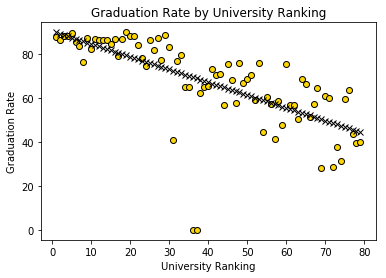

<Figure size 432x288 with 0 Axes>

In [65]:
#And the Graduation Rate by the ranking.
scatter_total_grad=plt.scatter(totalcount,total_grad,facecolor='Gold',edgecolor='Black')
plt.title("Graduation Rate by University Ranking")
plt.xlabel("University Ranking")
plt.ylabel("Graduation Rate")
z = np.polyfit(totalcount, total_grad, 1)
p = np.poly1d(z)
plt.plot(totalcount,p(totalcount),"kx")
#both of these showed the expected trend. Higher-ranked universities have higher graduation and retention rates.
plt.show()
plt.savefig('gradrate_by_universityrank.png')

In [ ]:
#out of vague curiousity I'm about to plot the graduation rate by the retention. Don't know why. Just doing a thing.
likely_nonsense_total=plt.scatter(total_grad,total_retain,facecolor='Gold',edgecolor='Black')
plt.title("Graduation Rate by Retention Rate")
plt.xlabel("Graduation Rate")
plt.ylabel("Retention Rate")
#z = np.polyfit(total_grad,total_retain, 1)
#p = np.poly1d(z)
#plt.plot(totalcount,p(totalcount),"k-")
plt.show()